First, we begin by reading in the data:

In [4]:
import pandas as pd
import numpy as np
#the file was converted to csv to make reading in easier
df=pd.read_csv('Healthcare_dataset.csv', engine='python')

In [5]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


Get an overview of the dataset:

In [6]:
print(df.info(verbose=True)) #check number of columns and rows, and the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

We see that there are only two numerical variables, Dexa_Freq_During_Rx and Count_Of_Risks 

Check for missing values:

In [7]:
print(df.isna().sum().sum()) #check for NA values

0


The maximum number of NA values in any column is 0, so there are no missing values

Let's identify duplicates:

In [8]:
df.duplicated().sum()

0

There are no duplicates

Let's modify the Age_Bucket column so that it will be easier to work with. We divide the classes into <55 (0) and and >=55(1) to compare younger and older people:

In [9]:
df["Age_Bucket"].replace("<55","0",inplace=True)   
df["Age_Bucket"].replace("55-65","1",inplace=True)   
df["Age_Bucket"].replace("65-75","1",inplace=True) 
df["Age_Bucket"].replace(">75","1",inplace=True) 

We found that most of the features in the dataset are categorical (or can be treated as categorical due to the low number of unique values within the column), and there were no missing values.

Let's check the value counts for the categorical features:

In [10]:
vc_cols=[i for i in df.columns if i not in ['Ptid','Count_Of_Risks','Dexa_Freq_During_Rx','Age_Bucket']]

for i in vc_cols:
    vc=df[i].value_counts()
    print(vc)

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64
Female    3230
Male       194
Name: Gender, dtype: int64
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPED

We see that some of the classes are imbalanced / skewed. For example there are only 194 males and 3230 females in the dataset. The vast majority of the patients are caucasian (3148 compared to 97, 95, 84), but that might be expected for the country the data was collected in. The regions are reasonably balanced. We see that the age ranges are mostly for older patients (~ 3300 55+ patients and only 166 patients aged <55. With regards to the specialist type, some specialisms are almost non-existent (e.g., radiology, podiatry, opthamology and some others only have 1 entry in the dataset). For most variables, there is a realistic-looking distribution for the classes. Some classes may have poor representation due to the circumstances / environment under which the data was collected, which is not a cause for concern. 

Let's create some box plots to check the outliers for numerical variables:

In [11]:
import seaborn as sns

Let's make a boxplot for the Count_Of_Risks variable:

<AxesSubplot:xlabel='Count_Of_Risks'>

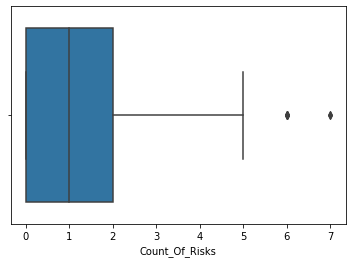

In [12]:
sns.boxplot(x=df["Count_Of_Risks"])

Let's check the number of outliers for the Count_Of_Risks variable:

In [13]:
print(sum(df["Count_Of_Risks"]>=6))

8


There are only 8 outliers in total for Count_Of_Risks in the dataset, and these values (6 and 7) are not astronomically high and probably weren't caused by input errors. These values can be found by using the risk variables.

<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

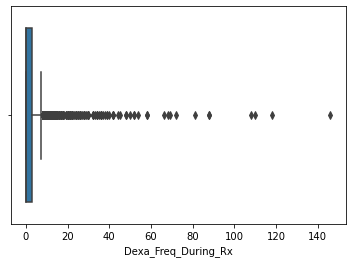

In [14]:
sns.boxplot(x=df['Dexa_Freq_During_Rx'])

A box plot may not be useful for finding outliers for the Dexa_Freq_During_Rx variable. This is because there are a very high number of values of 0s in the dataset, which results in the mean being very low, so even reasonably low values are treated as outliers. We don't have a strong reason to believe that removing any values would be beneficial in our analysis, or that they were input errors. 

Let's make dummy variables and drop the original variables to make the categorical variables easier to work with:

In [15]:
#make dummy variables for each category:
dummies=[i for i in df.columns if i not in ['Ptid','Count_Of_Risks','Dexa_Freq_During_Rx', 'Age_Bucket']]

df = pd.get_dummies(df, columns=dummies, drop_first=True)

Remove the Ps in the Ptid variable. This variable is the index:

In [16]:
df["Ptid"].replace("P","",inplace=True,regex=True)     

Ensure the datatypes are easy to work with for modelling etc:

In [17]:
df=df.astype(float)
df.columns = df.columns.astype(str)

Check the normality of the numerical variables:

In [18]:
import matplotlib.pyplot as plt

(array([ 970., 1242.,  781.,    0.,  317.,   91.,    0.,   15.,    6.,
           2.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

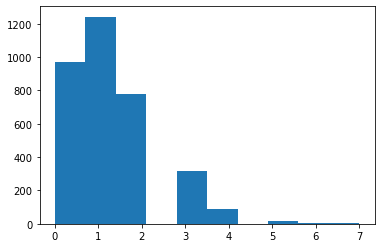

In [19]:
plt.hist(df["Count_Of_Risks"])

(array([3.261e+03, 1.140e+02, 2.800e+01, 1.000e+01, 4.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  14.6,  29.2,  43.8,  58.4,  73. ,  87.6, 102.2, 116.8,
        131.4, 146. ]),
 <BarContainer object of 10 artists>)

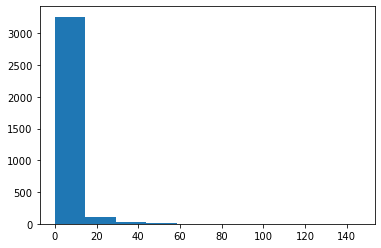

In [20]:
plt.hist(df["Dexa_Freq_During_Rx"])

Let's scale the data. The numerical variables don't follow a normal distribution, so let's use MinMaxScaler (to normalise it) instead of StandardScaler for scaling:

In [21]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df[["Count_Of_Risks", "Dexa_Freq_During_Rx"]] = mms.fit_transform(df[["Count_Of_Risks", "Dexa_Freq_During_Rx"]])

In [22]:
df["Count_Of_Risks"].mean()

0.17706942590120453

Although my intuition says that removing outliers isn't helpful, let's remove all the outliers (all values which deviate by more than 3 standard deviations from the mean), and see if this will improve model performance later on. Removing outliers could be useful as it will reduce the variability in the data. If it's not useful for analysis / modelling we will use the data with the outliers included. This code block was obtained from stack exchange:

In [23]:
from scipy import stats
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

Let's split the dataset into 2 dataframes / arrays: one for the features and one for the target (Persistency_Flag_Persistent):

In [24]:
#let the feature dataframe contain every column of df, except the value we are predicting,Persistency_Flag_Persistent
X=df.loc[:,df.columns!="Persistency_Flag_Persistent"]
#let the target array contain only the value we are predicting, Persistency_Flag_Persistent
# y=df.loc[:,df.columns=="heart_disease"].values.ravel()
y=df.loc[:,df.columns=="Persistency_Flag_Persistent"].values.ravel()


There are many features in the X array:

In [25]:
X.shape

(1215, 115)

It seems sensible to reduce the number of variables for analysis / modelling, and to focus on important variables. We could do some dimensionality reduction, but we want to be able to understand the variables individually, so  let's choose the 6 best variables (we did some experimenting, not shown here, to come up with this number):

In [26]:
from sklearn.feature_selection import SelectKBest,chi2

k=6
SKB = SelectKBest(chi2,k=k) #select the k best features
SKB.fit_transform(X, y) #fit the data to SKB

X_best_indices=SKB.get_support(indices=True) 

best_predictors=[None]*(k) #k best predictors
for i in range(0,k):
    best_predictors[i]=X.columns[X_best_indices[i]] #create list of names of best predictors
       
print('The best predictors are', " , ".join(best_predictors))  #print names of best predictors 

X_new=X[best_predictors].copy() #use list to create new X dataframe

The best predictors are Ptid , Dexa_During_Rx_Y , Comorb_Encounter_For_Immunization_Y , Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y , Comorb_Long_Term_Current_Drug_Therapy_Y , Concom_Viral_Vaccines_Y


It is strange that the index, Ptid, is so useful for predicting.

In [27]:
X_new.head()

,Ptid,Dexa_During_Rx_Y,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y",Comorb_Long_Term_Current_Drug_Therapy_Y,Concom_Viral_Vaccines_Y
3,4.0,0.0,1.0,1.0,0.0,1.0
4,5.0,0.0,1.0,1.0,0.0,0.0
5,6.0,0.0,0.0,0.0,0.0,0.0
7,8.0,0.0,0.0,0.0,0.0,0.0
8,9.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X_new.shape

(1215, 6)

The following is just a simple logistic regression, mainly for testing the quality of the data (I compared the data with outliers to the data without outliers, but I didn't show this in the notebook). I found that once I had removed the outliers, the model performed better, even with just 6 variables.  Increasing the number of best variables past this point didn't improve the accuracy.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

X_train, X_test, y_train, y_test=train_test_split(X_new,y,test_size=0.30,random_state=123)   

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [31]:
logreg=LogisticRegression(max_iter=1000000)
logreg.fit(X_train,y_train)
preds=logreg.predict(X_test)
print(f1_score(y_test,preds, average='macro')) #use macro scoring since classes are imbalanced
print(accuracy_score(y_test,preds)) 

0.7550883471259227
0.8027397260273973


For other models / hyperparameters, increasing the number of features could be beneficial. In this example, the number of variables only marginally increased the accuracy after 3 variables (0.79 accuracy with 3 variables).